In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
import math
from sklearn.metrics import mean_squared_error
import random
import itertools
import statistics
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
X = 'https://drive.google.com/open?id=1cw_VD3AT8RKNNI67kxyg2uph9NVi7mRc'
downloaded = drive.CreateFile({'id':'1cw_VD3AT8RKNNI67kxyg2uph9NVi7mRc'}) 
downloaded.GetContentFile('X.txt')

Y = 'https://drive.google.com/open?id=1pySFqfJIaqpVZ9o8VdMKmKmvOmY2V0Lq'
downloaded = drive.CreateFile({'id':'1pySFqfJIaqpVZ9o8VdMKmKmvOmY2V0Lq'}) 
downloaded.GetContentFile('Y.txt')

features = 'https://drive.google.com/open?id=1TG8GBeGAK5EziMJXazCtyUSTvbGkhjKP'
downloaded = drive.CreateFile({'id':'1TG8GBeGAK5EziMJXazCtyUSTvbGkhjKP'}) 
downloaded.GetContentFile('features.txt')

classes = 'https://drive.google.com/open?id=1KZaF2Pxi6gwqFWN9nXvmmm-MO_iDvLrg'
downloaded = drive.CreateFile({'id':'1KZaF2Pxi6gwqFWN9nXvmmm-MO_iDvLrg'}) 
downloaded.GetContentFile('activity_labels.txt')

### (c)Data Pre-processing

In [10]:
#data reading
X_raw = np.genfromtxt("X.txt", delimiter=" ", skip_header=1)
Y_raw = np.genfromtxt('Y.txt', delimiter=" ", skip_header=1)
X_raw.shape

(10928, 561)

### Data Pre-processing - Find Missing Values

In [0]:
nan_list = []
for i in range(X_raw.shape[0]):
  for j in range(X_raw.shape[1]):
    s = np.isnan(X_raw[i][j])
    if s == 'true':
      nan_list.append((i,j))

In [12]:
print("nan_list =",nan_list)

nan_list = []


### (e)Splitting data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_dev_test, Y_train, Y_dev_test = train_test_split(X_raw, Y_raw, test_size=0.2, random_state=3)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_dev_test, Y_dev_test, test_size=0.5, random_state=5)
print('X_train_shape = ', X_train.shape)
print('X_dev_shape = ', X_dev.shape)
print('X_test_shape = ', X_test.shape)

X_train_shape =  (8742, 561)
X_dev_shape =  (1093, 561)
X_test_shape =  (1093, 561)


### (c) Data Pre-processing - Convert to categorical

In [21]:
y_train_cat = to_categorical(Y_train)
y_dev_cat = to_categorical(Y_dev)
y_test_cat = to_categorical(Y_test)

print('y_train_cat shape = ', y_train_cat.shape)
print('y_dev_cat shape = ', y_dev_cat.shape)
print('y_test_cat shape = ', y_test_cat.shape)

y_train_cat shape =  (8742, 13)
y_dev_cat shape =  (1093, 13)
y_test_cat shape =  (1093, 13)


### (d) Data Exploration - Visualization

In [64]:
features = pd.read_csv('features.txt',header=None)
classes = pd.read_csv('activity_labels.txt',header=None)
print("feature_shape =",features.shape)
print("Classes_shape=",classes.shape)

feature_shape = (561, 1)
Classes_shape= (12, 1)


In [65]:
features.head()

,0
0,tBodyAcc-Mean-1
1,tBodyAcc-Mean-2
2,tBodyAcc-Mean-3
3,tBodyAcc-STD-1
4,tBodyAcc-STD-2


In [66]:
classes.columns = ['Activities']
classes

,Activities
0,1 WALKING
1,2 WALKING_UPSTAIRS
2,3 WALKING_DOWNSTAIRS
3,4 SITTING
4,5 STANDING
5,6 LAYING
6,7 STAND_TO_SIT
7,8 SIT_TO_STAND
8,9 SIT_TO_LIE
9,10 LIE_TO_SIT


In [67]:
classes[['Num','Activity']] = classes.Activities.str.split(expand=True)
classes = classes.drop(columns='Activities')
classes = classes.drop(columns='Num')

,Activity
0,WALKING
1,WALKING_UPSTAIRS
2,WALKING_DOWNSTAIRS
3,SITTING
4,STANDING
5,LAYING
6,STAND_TO_SIT
7,SIT_TO_STAND
8,SIT_TO_LIE
9,LIE_TO_SIT


In [71]:
classes_list = classes['Activity'].to_list()
classes_list

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING',
 'STAND_TO_SIT',
 'SIT_TO_STAND',
 'SIT_TO_LIE',
 'LIE_TO_SIT',
 'STAND_TO_LIE',
 'LIE_TO_STAND']

In [74]:
features.columns = ['Features']
feature_list = features['Features'].to_list()
feature_list

['tBodyAcc-Mean-1                ',
 'tBodyAcc-Mean-2                ',
 'tBodyAcc-Mean-3                ',
 'tBodyAcc-STD-1                 ',
 'tBodyAcc-STD-2                 ',
 'tBodyAcc-STD-3                 ',
 'tBodyAcc-Mad-1                 ',
 'tBodyAcc-Mad-2                 ',
 'tBodyAcc-Mad-3                 ',
 'tBodyAcc-Max-1                 ',
 'tBodyAcc-Max-2                 ',
 'tBodyAcc-Max-3                 ',
 'tBodyAcc-Min-1                 ',
 'tBodyAcc-Min-2                 ',
 'tBodyAcc-Min-3                 ',
 'tBodyAcc-SMA-1                 ',
 'tBodyAcc-Energy-1              ',
 'tBodyAcc-Energy-2              ',
 'tBodyAcc-Energy-3              ',
 'tBodyAcc-IQR-1                 ',
 'tBodyAcc-IQR-2                 ',
 'tBodyAcc-IQR-3                 ',
 'tBodyAcc-ropy-1                ',
 'tBodyAcc-ropy-1                ',
 'tBodyAcc-ropy-1                ',
 'tBodyAcc-ARCoeff-1             ',
 'tBodyAcc-ARCoeff-2             ',
 'tBodyAcc-ARCoeff-3        

### (d) Plotting random feaures for visualization

In [79]:
feat_rand_num = []
for i in range(17):
  random.seed(i)
  feat_rand_num.append(random.randint(0, len(feature_list)))
feat_rand_num

[394,
 137,
 57,
 243,
 241,
 261,
 82,
 331,
 232,
 474,
 33,
 463,
 485,
 265,
 109,
 213,
 370]

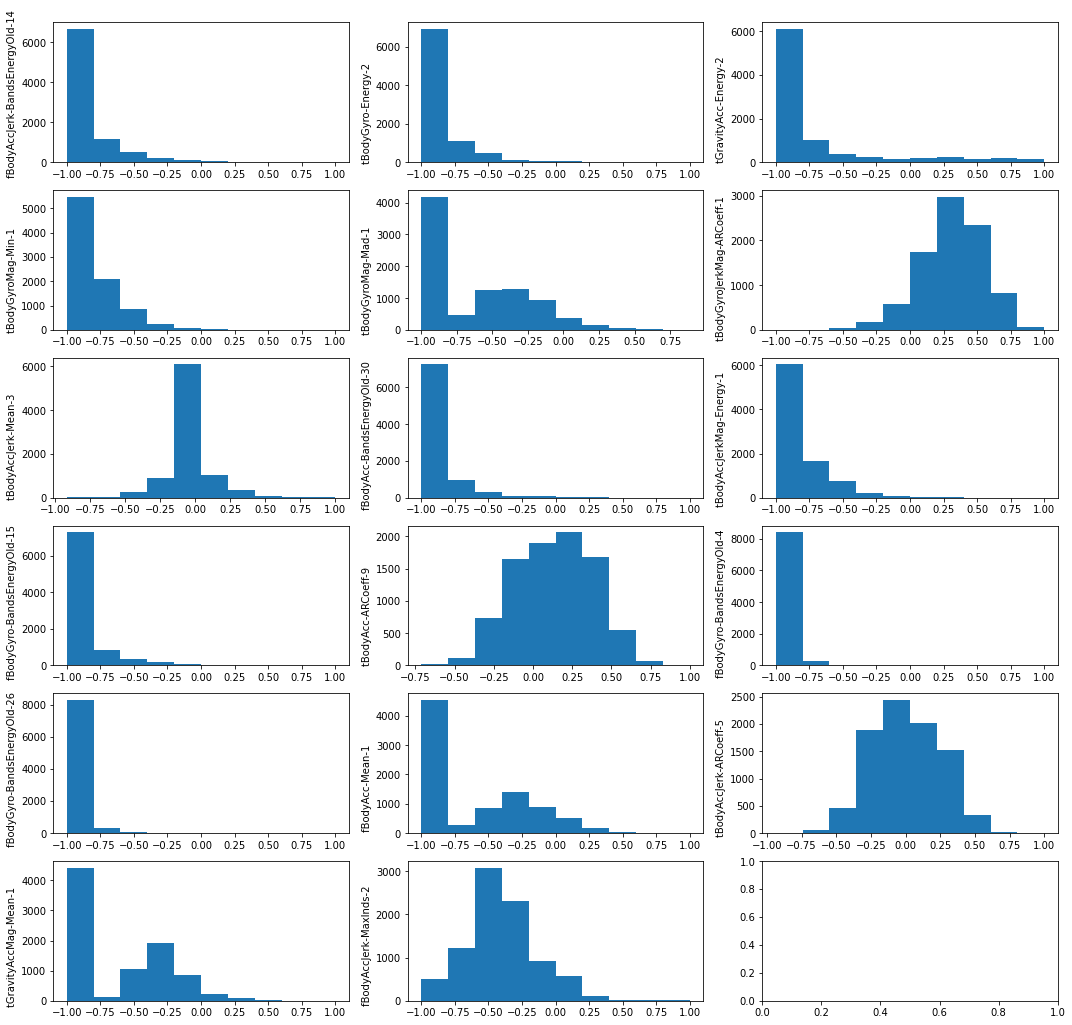

In [80]:
fig, axs = plt.subplots(6, 3, figsize=(18,18))
for i in range(17):
    plt.subplot(6,3,i+1)
    plt.ylabel(feature_list[feat_rand_num[i]])
    df3 = X_train[:,feat_rand_num[i]]
    plt.hist(df3)

### Data Exploration - Pearson's correlation

In [82]:
for i in range(15):
    for k in range(15):
        if((feature_list[feat_rand_num[i]]!=feature_list[feat_rand_num[k]]) and (i<k)):
          print(feature_list[feat_rand_num[i]],feature_list[feat_rand_num[k]],pearsonr(X_train[:,feat_rand_num[i]],X_train[:,feat_rand_num[k]])[0])

fBodyAccJerk-BandsEnergyOld-14  tBodyGyro-Energy-2              0.5327460089139832
fBodyAccJerk-BandsEnergyOld-14  tGravityAcc-Energy-2            -0.23928350805256868
fBodyAccJerk-BandsEnergyOld-14  tBodyGyroMag-Min-1              0.4975632387886891
fBodyAccJerk-BandsEnergyOld-14  tBodyGyroMag-Mad-1              0.6489282317487536
fBodyAccJerk-BandsEnergyOld-14  tBodyGyroJerkMag-ARCoeff-1      -0.04195020188607894
fBodyAccJerk-BandsEnergyOld-14  tBodyAccJerk-Mean-3             -0.019224526536639048
fBodyAccJerk-BandsEnergyOld-14  fBodyAcc-BandsEnergyOld-30      0.5805569167492097
fBodyAccJerk-BandsEnergyOld-14  tBodyAccJerkMag-Energy-1        0.8950251706412384
fBodyAccJerk-BandsEnergyOld-14  fBodyGyro-BandsEnergyOld-15     0.3878795625504608
fBodyAccJerk-BandsEnergyOld-14  tBodyAcc-ARCoeff-9              -0.18452723583113415
fBodyAccJerk-BandsEnergyOld-14  fBodyGyro-BandsEnergyOld-4      0.6354156259231525
fBodyAccJerk-BandsEnergyOld-14  fBodyGyro-BandsEnergyOld-26     0.516225303007

In [0]:
def accuracy(y,Y_pred):
  count = 0
  for i,val in enumerate(y):
    if (val == Y_pred[i]):
      count = count + 1
  accuracy = count/y.shape[0]
  return accuracy

### (b) Problem formulation

In [16]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)
y_pred_dev = clf.predict(X_test)
acc = accuracy(Y_test,y_pred_dev)
acc

0.9780420860018298

In [24]:
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs


from keras.models import Sequential
from keras.layers import Dense, Dropout


#  Define a Feed-Forward Model with 2 hidden layers with dimensions 392 and 196 Neurons
model = Sequential([
  Dense(50, activation='relu', input_shape=(561,), name="first_hidden_layer"),
  Dense(100, activation='relu', name="second_hidden_layer"), 
  Dense(100,activation= 'relu',name = "third_hidden_layer"),
  Dense(100,activation= 'relu',name = "forth_hidden_layer"),
  Dense(100,activation= 'relu',name = "fifth_hidden_layer"),
  Dense(13, activation='softmax'),
])

#  Validate your Model Architecture
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden_layer (Dense)   (None, 50)                28100     
_________________________________________________________________
second_hidden_layer (Dense)  (None, 100)               5100      
_________________________________________________________________
third_hidden_layer (Dense)   (None, 100)               10100     
_________________________________________________________________
forth_hidden_layer (Dense)   (None, 100)               10100     
_________________________________________________________________
fifth_hidden_layer (Dense)   (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 13)                1313      
Total params: 64,813
Trainable params: 64,813
Non-trainable params: 0
__________________________________________________

In [26]:
# Compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Train model
model.fit(X_train, y_train_cat, epochs=100, batch_size=256,)

Epoch 1/100
8742/8742 [==============================] - 0s 26us/step - loss: 0.2142 - accuracy: 0.9128
Epoch 2/100
8742/8742 [==============================] - 0s 18us/step - loss: 0.2139 - accuracy: 0.9157
Epoch 3/100
8742/8742 [==============================] - 0s 18us/step - loss: 0.2246 - accuracy: 0.9084
Epoch 4/100
8742/8742 [==============================] - 0s 18us/step - loss: 0.1987 - accuracy: 0.9213
Epoch 5/100
8742/8742 [==============================] - 0s 18us/step - loss: 0.2109 - accuracy: 0.9152
Epoch 6/100
8742/8742 [==============================] - 0s 18us/step - loss: 0.2128 - accuracy: 0.9123
Epoch 7/100
8742/8742 [==============================] - 0s 18us/step - loss: 0.2038 - accuracy: 0.9192
Epoch 8/100
8742/8742 [==============================] - 0s 18us/step - loss: 0.2205 - accuracy: 0.9179
Epoch 9/100
8742/8742 [==============================] - 0s 18us/step - loss: 0.1895 - accuracy: 0.9277
Epoch 10/100
8742/8742 [==============================] - 0s 18u

In [27]:
# Evaluate your model's performance on the test data
performance_val = model.evaluate(X_dev, y_dev_cat)
performance_test = model.evaluate(X_test, y_test_cat)
print("Accuracy on Val samples: {0}".format(performance_val[1]))
print("Accuracy on Test samples: {0}".format(performance_test[1]))


1093/1093 [==============================] - 0s 78us/step
Accuracy on Val samples: 0.9579139947891235
Accuracy on Test samples: 0.9560841917991638


### (f) Feature Selection

In [8]:
selected_features = []
acc_updates = []

#while(not (len(acc_updates)) or acc_updates[-1] >= 0.6 or (abs(acc_updates[-1] - acc_updates[-2]) <= 0.1)):
for i in range(10):
    acc_feature_set_dict = {}
    for feature in range(X_train.shape[1]):
        if feature not in selected_features:
            clf = LogisticRegression()
            #add this to existing feature set
            intermediate_feature_set = selected_features.copy()
            intermediate_feature_set.append(feature)
            #print(intermediate_feature_set)
            #create a model that has only these features
            clf.fit(X_train[:,intermediate_feature_set],Y_train)
            y_pred = clf.predict(X_dev[:,intermediate_feature_set])
            #Find acc of the model
            acc = accuracy(Y_dev, y_pred)
            acc_feature_set_dict[acc] = intermediate_feature_set[-1]
            
    #Find minimum of keys,select the feature with minimum loss as the new feature to the list
    #print(acc_feature_set_dict)
    max_acc = max(acc_feature_set_dict.keys())
    #print(max_acc)
    selected_feature = acc_feature_set_dict[max_acc]
    selected_features.append(selected_feature)
    acc_updates.append(max_acc)
    print("iteration = ",i)
    print("selected_features =", selected_features)
    print("acc_updates =" ,acc_updates)


iteration =  0
selected_features = [274]
acc_updates = [0.505946935041171]
iteration =  1
selected_features = [274, 53]
acc_updates = [0.505946935041171, 0.7557182067703568]
iteration =  2
selected_features = [274, 53, 507]
acc_updates = [0.505946935041171, 0.7557182067703568, 0.8005489478499542]
iteration =  3
selected_features = [274, 53, 507, 52]
acc_updates = [0.505946935041171, 0.7557182067703568, 0.8005489478499542, 0.8426349496797805]
iteration =  4
selected_features = [274, 53, 507, 52, 65]
acc_updates = [0.505946935041171, 0.7557182067703568, 0.8005489478499542, 0.8426349496797805, 0.8819762122598354]
iteration =  5
selected_features = [274, 53, 507, 52, 65, 549]
acc_updates = [0.505946935041171, 0.7557182067703568, 0.8005489478499542, 0.8426349496797805, 0.8819762122598354, 0.8929551692589204]
iteration =  6
selected_features = [274, 53, 507, 52, 65, 549, 22]
acc_updates = [0.505946935041171, 0.7557182067703568, 0.8005489478499542, 0.8426349496797805, 0.8819762122598354, 0.89

In [9]:
selected_features

[274, 53, 507, 52, 65, 549, 22, 102, 104, 317]

In [10]:
acc_updates

[0.505946935041171,
 0.7557182067703568,
 0.8005489478499542,
 0.8426349496797805,
 0.8819762122598354,
 0.8929551692589204,
 0.9011893870082343,
 0.9103385178408051,
 0.918572735590119,
 0.9231473010064044]

In [11]:
X_train_new = np.array([X_train[:,selected_features[0]]]).T
for feature in selected_features[1:]:
  X_train_new = np.hstack((X_train_new,np.array([X_train[:,feature]]).T))
X_train_new.shape

(8742, 10)

In [12]:
X_test_new = np.array([X_test[:,selected_features[0]]]).T
for feature in selected_features[1:]:
  X_test_new = np.hstack((X_test_new,np.array([X_test[:,feature]]).T))
X_test_new.shape

(1093, 10)

In [13]:
clf = LogisticRegression()
clf.fit(X_train_new,Y_train)
y_pred_test_feat_sel = clf.predict(X_test_new)
acc = accuracy(Y_test,y_pred_test_feat_sel)
print("test_acc = ",acc)

test_acc =  0.9030192131747484


### (g) Feature Transformation

In [0]:
from sklearn.preprocessing import normalize
from numpy import linalg as LA
#mean normalizing
# normalizing

X_train_norm  = np.asarray(X_train)

for i in range(X_train_norm.shape[1]):
  X_train_i_mean = np.mean(X_train_norm[:,i])
  X_train_norm[:,i] = X_train_norm[:,i] - X_train_i_mean

#print(X_train_norm)

#Compute covariance matrix
S = (np.matmul(X_train_norm.T,X_train_norm))/(X_train_norm.shape[1]-1)
w, P = LA.eigh(S)
#Sort in descending order
w_rev = w[::-1]
P_rev = np.fliplr(P)

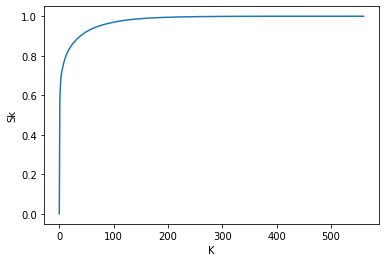

In [15]:
sum_all_eig_val = np.sum(w_rev)
#print(sum_all_eig_val)
y_axis = []
x_axis = []
for k in range(w_rev.shape[0]):
  sum_first_k_eig_val = np.sum(w_rev[:k])
  #print(sum_first_k_eig_val)
  y_axis.append(sum_first_k_eig_val/sum_all_eig_val)
  x_axis.append(k)

plt.xlabel('K')
plt.ylabel('Sk')
plt.plot(y_axis)

In [0]:
from sklearn.metrics import accuracy_score
K_vals = [50,100,150,200,250,300,561]
acc_scores = []
D = w.shape[0]
for K in K_vals:
  if K > D:
    print("Invalid K")
    break
  else:
    count = 0
    U = np.asarray(P_rev)
    U = U[:,:K]
    X_transformed = np.matmul(X_train_norm,U)
    #print(X_transformed.shape)
    clf = LogisticRegression()
    clf.fit(X_transformed,Y_train)
    X_dev_transformed = np.matmul(X_dev,U)
    y_pred = clf.predict(X_dev_transformed)
    acc = accuracy(Y_dev,y_pred)
    acc_scores.append(acc)

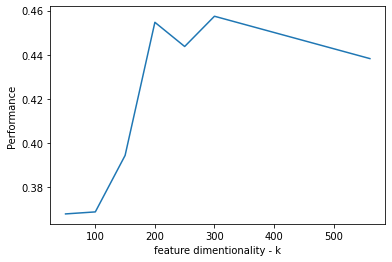

In [19]:
plt.xlabel('feature dimentionality - k')
plt.ylabel('Performance')
plt.plot(K_vals,acc_scores)

In [20]:
K = 300
U = np.asarray(P_rev)
U = U[:,:K]
X_transformed = np.matmul(X_train_norm,U)
clf = LogisticRegression()
clf.fit(X_transformed,Y_train)
X_test_transformed = np.matmul(X_test,U)
y_pred_test = clf.predict(X_test_transformed)
acc = accuracy(Y_test,y_pred_test)
print("test_acc = ",acc)

test_acc =  0.48124428179322964


In [0]:
X_transformed = np.matmul(X_train_norm,U)
X_dev_transformed = np.matmul(X_dev,U)
X_test_transformed = np.matmul(X_test,U)

### (h) Support Vector Machine

In [0]:
from sklearn import svm

In [23]:
C_list = [0.01,0.1,0.5,0.8,1,1.5,10,100]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
  for c in C_list:
    #print(c)
    clf_svm = svm.SVC(C = c,kernel=kernel,random_state=20)
    #clf_svm = svm.LinearSVC(multi_class='ovr', C=c, penalty='l2')
    clf_svm.fit(X_transformed,Y_train)
    y_pred_val_svm = clf_svm.predict(X_dev_transformed)
    acc = accuracy(Y_dev,y_pred_val_svm)
    #c_dict[acc] = [c,kernel]
    print("c = ",c,"kernel = ",kernel,"acc = ",acc)

c =  0.01 kernel =  linear acc =  0.36688014638609334
c =  0.1 kernel =  linear acc =  0.3559011893870082
c =  0.5 kernel =  linear acc =  0.282708142726441
c =  0.8 kernel =  linear acc =  0.27813357731015553
c =  1 kernel =  linear acc =  0.2735590118938701
c =  1.5 kernel =  linear acc =  0.2698993595608417
c =  10 kernel =  linear acc =  0.2607502287282708
c =  100 kernel =  linear acc =  0.39524245196706315
c =  0.01 kernel =  poly acc =  0.41994510521500455
c =  0.1 kernel =  poly acc =  0.32936870997255263
c =  0.5 kernel =  poly acc =  0.2040256175663312
c =  0.8 kernel =  poly acc =  0.19213174748398903
c =  1 kernel =  poly acc =  0.19030192131747484
c =  1.5 kernel =  poly acc =  0.19121683440073192
c =  10 kernel =  poly acc =  0.21225983531564502
c =  100 kernel =  poly acc =  0.20494053064958828
c =  0.01 kernel =  rbf acc =  0.1445562671546203
c =  0.1 kernel =  rbf acc =  0.1445562671546203
c =  0.5 kernel =  rbf acc =  0.1445562671546203
c =  0.8 kernel =  rbf acc =  0

In [24]:
clf_svm = svm.SVC(C = 0.01,kernel='poly',random_state=20)
clf_svm.fit(X_transformed,Y_train)
y_pred_test_svm = clf_svm.predict(X_test_transformed)
acc = accuracy(Y_test,y_pred_test_svm)
print("test_acc = ",acc)

test_acc =  0.43824336688014637


### (i) Ensemble Learning

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
acc_list = []
acc_est_dict = {}
for est_n in range(1,15):
  estimator = DecisionTreeClassifier(max_depth=2)
  clf_ada = AdaBoostClassifier(estimator, n_estimators = est_n,random_state=80, algorithm = 'SAMME')
  clf_ada.fit(X_train,Y_train)
  y_pred_ada = clf_ada.predict(X_dev)
  acc = accuracy(Y_dev,y_pred_ada)
  acc_list.append(acc)
  acc_est_dict[est_n] = acc
  print("number of estimators = ",est_n,"acc =" ,acc)

number of estimators =  1 acc = 0.27813357731015553
number of estimators =  2 acc = 0.19853613906678866
number of estimators =  3 acc = 0.22964318389752975
number of estimators =  4 acc = 0.22964318389752975
number of estimators =  5 acc = 0.1939615736505032
number of estimators =  6 acc = 0.1948764867337603
number of estimators =  7 acc = 0.3037511436413541
number of estimators =  8 acc = 0.322964318389753
number of estimators =  9 acc = 0.33485818847209514
number of estimators =  10 acc = 0.2790484903934126
number of estimators =  11 acc = 0.2753888380603843
number of estimators =  12 acc = 0.27630375114364136
number of estimators =  13 acc = 0.2753888380603843
number of estimators =  14 acc = 0.2698993595608417


In [27]:
est_n_best = 9
estimator = DecisionTreeClassifier(max_depth=2)
clf_ada_test = AdaBoostClassifier(estimator, n_estimators = est_n,random_state=80, algorithm = 'SAMME')
clf_ada_test.fit(X_train,Y_train)
y_pred_ada_test = clf_ada.predict(X_test)
print("test_acc = ",accuracy(Y_test,y_pred_ada))

test_acc =  0.1655992680695334
